In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [2]:
movies = pd.read_csv('/Users/mirandidallas-fuge/Desktop/AllMoviesDetailsCleaned.csv', sep=';', low_memory=False)
cast = pd.read_csv('/Users/mirandidallas-fuge/Desktop/AllMoviesCastingRaw.csv', sep=';', low_memory=False)
directors = pd.read_csv('/Users/mirandidallas-fuge/Desktop/900_acclaimed_directors_awards.csv', sep=';', low_memory=False)

In [3]:
movies.popularity = pd.to_numeric(movies.popularity.str.replace(',',''))

In [4]:
#create genre variables

movies =  movies[movies.revenue > 0]
genres = set()
movies['genres'] = movies['genres'].astype(str)
for row in movies['genres']:
    row = row.split('|')
    for genre in row:
        genres.add(genre)
        
for g in genres:
    movies["is_genre_" + g.replace(" ","_")] = list(map(lambda x : int(g in str(x)), movies["genres"]))

In [5]:
#create star_power variable
movies = pd.merge(movies, cast, on='id')
movies['star_power'] = 0


In [6]:
movies.head()

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,...,actor5_gender,actor_number,director_name,director_gender,director_number,producer_name,producer_number,screeplay_name,editor_name,star_power
0,5,4000000,Crime|Comedy,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,1.698000,Miramax Films,United States of America,...,1,24,Allison Anders,1.0,4,Lawrence Bender,1,none,Margaret Goodspeed,0
1,6,0,Action|Thriller|Crime,tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",1.322870,Universal Pictures,Japan,...,2,15,Stephen Hopkins,2.0,1,Gene Levy,1,Lewis Colick,Tim Wellburn,0
2,11,11000000,Adventure|Action|Science Fiction,tt0076759,en,Star Wars,Princess Leia is captured and held hostage by ...,10.492614,Lucasfilm,United States of America,...,2,106,George Lucas,2.0,1,Gary Kurtz,2,none,Marcia Lucas,0
3,12,94000000,Animation|Family,tt0266543,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",9.915573,Pixar Animation Studios,United States of America,...,2,24,Andrew Stanton,2.0,1,Graham Walters,1,Andrew Stanton,David Ian Salter,0
4,13,55000000,Comedy|Drama|Romance,tt0109830,en,Forrest Gump,A man with a low IQ has accomplished great thi...,10.351236,Paramount Pictures,United States of America,...,1,67,Robert Zemeckis,2.0,1,Wendy Finerman,3,Eric Roth,Arthur Schmidt,0


In [7]:
for row_num in range(0, movies.shape[0]): 
    if movies.director_name.iloc[row_num] in list(directors['name']):
        movies.star_power.iloc[row_num] = directors['Total awards'].iloc[(np.where(movies.director_name.iloc[row_num] == directors['name'])[0][0])]


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
actors = {}

for row_num in range(0, movies.shape[0]):
    for column in ['actor1_name', 'actor2_name', 'actor3_name', 'actor4_name', 'actor5_name']:
        if movies[column].iloc[row_num] not in actors:
            actors[movies[column].iloc[row_num]] = 1
        else:
            actors[movies[column].iloc[row_num]] += 1


In [9]:
actors['none'] = 0


In [10]:
for row_num in range(0, movies.shape[0]): 
    movies.star_power.iloc[row_num] = movies.star_power.iloc[row_num] + (actors[movies.actor1_name.iloc[row_num]] + 
                                                                         actors[movies.actor2_name.iloc[row_num]] +
                                                                         actors[movies.actor3_name.iloc[row_num]] +
                                                                         actors[movies.actor4_name.iloc[row_num]] +
                                                                         actors[movies.actor5_name.iloc[row_num]])

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
#create blockbuster_season and oscar_season variables
movies.release_date = pd.to_datetime(movies.release_date, format='%d/%m/%Y')

movies['blockbuster_season'] = 0
movies['oscar_season'] = 0


In [12]:
for row_num in range(0, movies.shape[0]):
    if movies.release_date.iloc[row_num].month in [6, 7, 8]: # blockbuster season
        movies['blockbuster_season'].iloc[row_num] = 1
    if movies.release_date.iloc[row_num].month in [11, 12]: # oscar season
        movies['oscar_season'].iloc[row_num] = 1

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
#train test split
movies2 = movies.sample(frac=1) # shuffle movies
movies2 = movies2[movies2.columns[[1, 7, 11, 12, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 
                42, 61, 62, 63]]].dropna().reset_index(drop=True)
train_x = movies2.drop(['revenue'], axis=1).iloc[:6000]
train_y = movies2.revenue[:6000]
test_x = movies2.drop(['revenue'], axis=1).iloc[6000:]
test_y = movies2.revenue[6000:]

In [14]:
###regression
#linear regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)
predictions = regr.predict(test_x)

print("Mean squared error: %.2f"
      % mean_squared_error(test_y, predictions))


Mean squared error: 3876868265398203.00


In [15]:
# lasso
lasso = linear_model.Lasso(alpha=.5)

lasso.fit(train_x, train_y)
predictions = lasso.predict(test_x)
print("Mean squared error: %.2f"
      % mean_squared_error(test_y, predictions))


Mean squared error: 3876868273843607.50


In [16]:
###classification
#create revenue classes
movies2['class'] = 0

for row_num in range(0, movies2.shape[0]):
    if movies2.revenue.iloc[row_num] > 100000000:
        movies2['class'].iloc[row_num] = 3
    elif movies2.revenue.iloc[row_num] > 50000000:
        movies2['class'].iloc[row_num] = 2
    else:
        movies2['class'].iloc[row_num] = 1

#train test split
train_x = movies2.drop(['revenue', 'class'], axis=1).iloc[:6000]
train_y = movies2['class'].iloc[:6000]
test_x = movies2.drop(['revenue', 'class'], axis=1).iloc[6000:]
test_y = movies2['class'].iloc[6000:]

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
#DO RANDOM FOREST
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
random_forest.fit(train_x, train_y);


In [18]:
# Use the forest's predict method on the test data
predictions = random_forest.predict(test_x)

# Calculate the absolute errors
errors = abs(predictions - test_y)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.24 degrees.


Our average estimate is off by 0.24 degrees. That is less than a 1 degree worse than the baseline.

In [19]:
#DO KNN 
train_x.head()  

,budget,popularity,runtime,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number,is_genre_Animation,is_genre_Horror,...,is_genre_Family,is_genre_Music,is_genre_nan,is_genre_Foreign,is_genre_TV_Movie,is_genre_Action,is_genre_Documentary,star_power,blockbuster_season,oscar_season
0,80000000,2.002882,126.0,6.3,232,5,1,1,0,0,...,0,0,0,0,0,0,0,181,0,1
1,65000000,5.048667,120.0,6.9,2418,3,1,4,0,0,...,0,0,0,0,0,1,0,82,0,0
2,9250000,0.830740,125.0,6.8,26,1,1,1,0,0,...,0,1,0,0,0,0,0,42,0,1
3,8000000,0.148053,124.0,6.1,17,0,1,2,0,0,...,0,0,0,0,0,0,0,9,0,0
4,0,0.234711,95.0,5.0,8,3,2,2,0,0,...,0,0,0,0,0,0,0,50,0,0


In [20]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(train_x)

X_train = scaler.transform(train_x)  
X_test = scaler.transform(test_x) 

In [21]:
from sklearn.neighbors import KNeighborsClassifier  
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, train_y)
y_pred = knn.predict(X_test)

In [22]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))

Accuracy: 0.8158830501777954


classification rate of 80.36%, considered as good accuracy

In [23]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,train_y)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != test_y))

Text(0,0.5,'Mean Error')

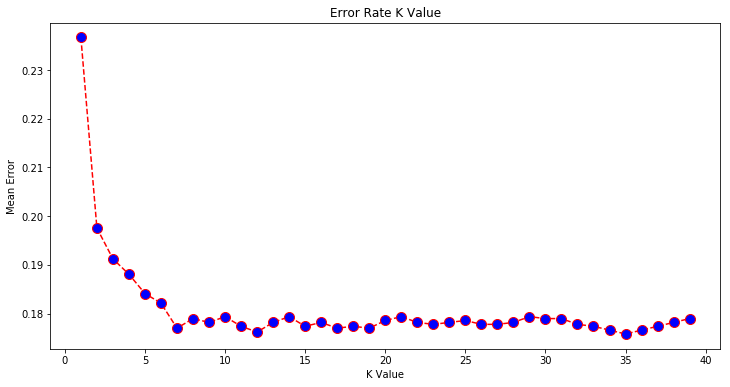

In [24]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

In [25]:
# heat map
import seaborn as sns; sns.set(color_codes=True)

In [36]:
movies2.head()
class_for_classification = movies2.pop("class")

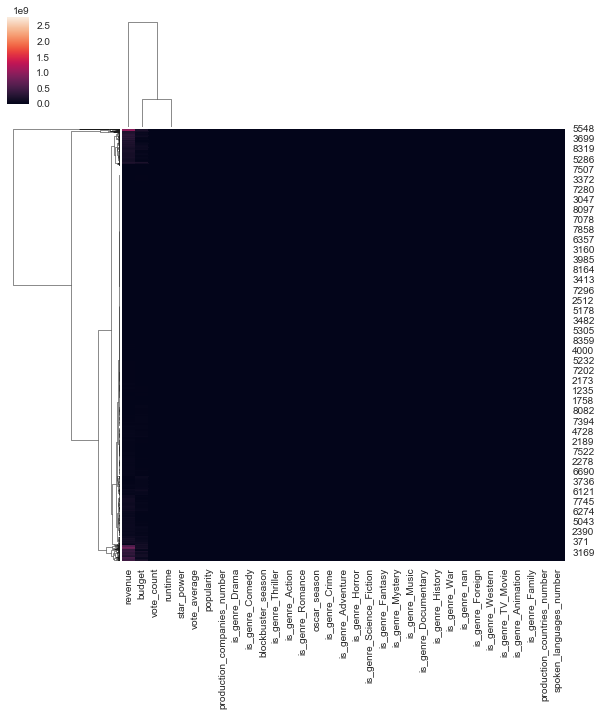

In [37]:
g = sns.clustermap(movies2)

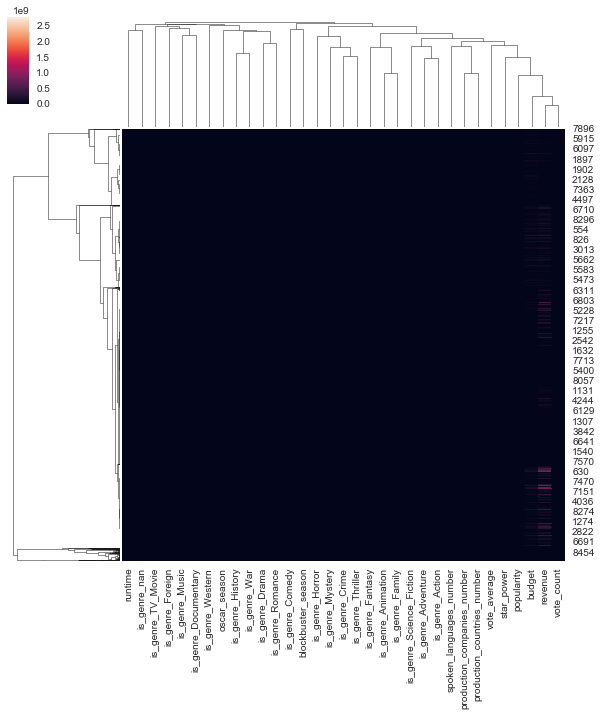

In [38]:
g = sns.clustermap(movies2, metric="correlation")

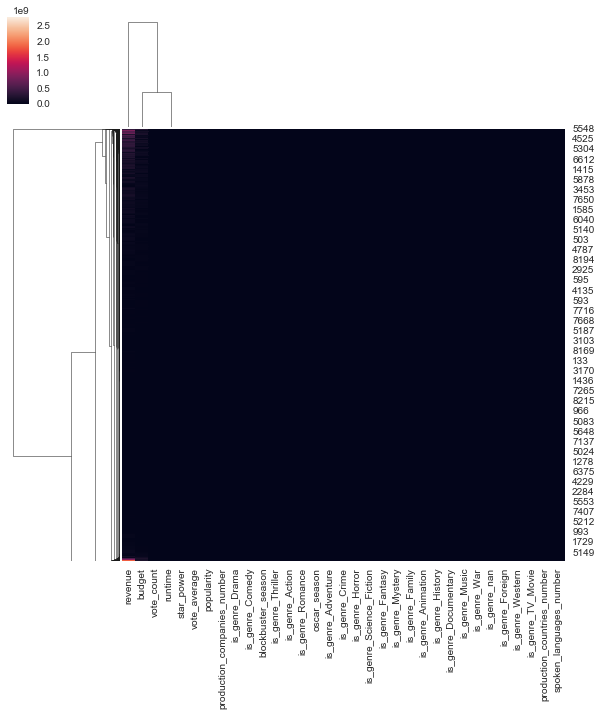

In [39]:
# Use a different clustering method:
g = sns.clustermap(movies2, method="single")

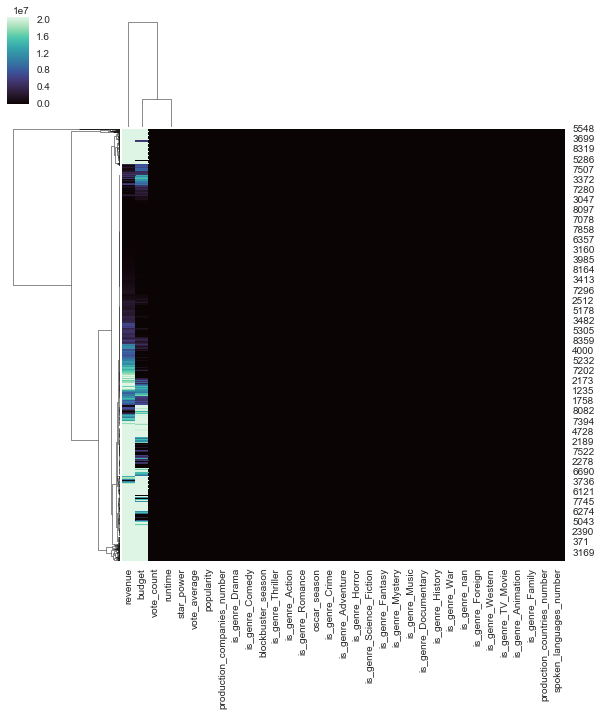

In [40]:
# Use a different colormap and ignore outliers in colormap limits:
g = sns.clustermap(movies2, cmap="mako", robust=True)

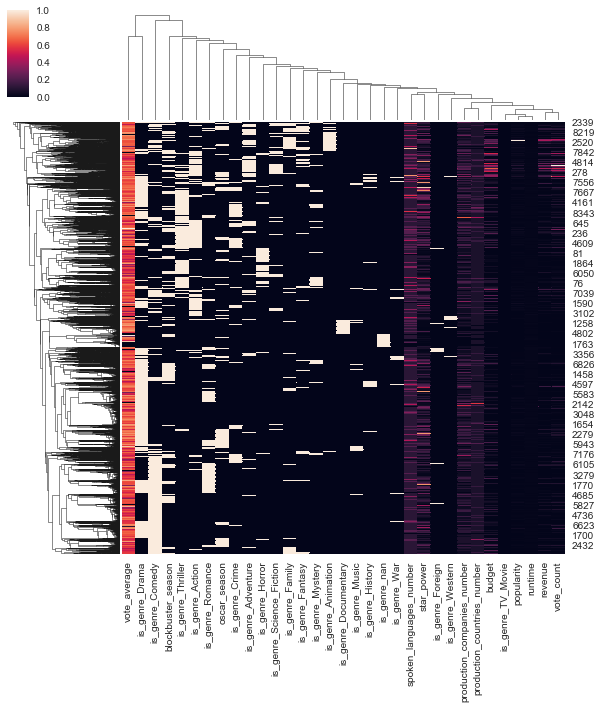

In [41]:
# Standardize the data within the columns:
g = sns.clustermap(movies2, standard_scale=1)

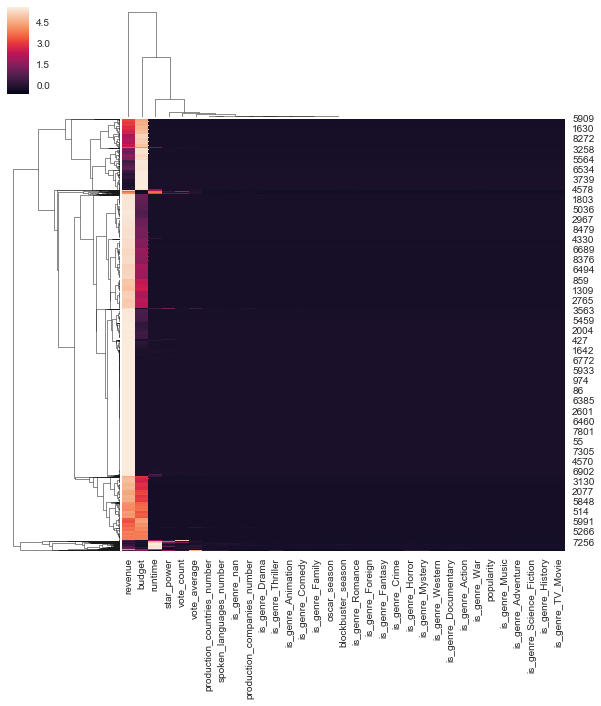

In [42]:
# Normalize the data within the rows
g = sns.clustermap(movies2, z_score=0)